In [23]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# **Vizualizando datos**

In [24]:
import pandas as pd

# Cargar el archivo proporcionado por el usuario para analizar las columnas
file_path = '/content/Drive/MyDrive/datos/iris1.csv'
data = pd.read_csv(file_path)

# Inspeccionar las primeras filas y la información del dataset
data_info = data.info()
data_head = data.head()
columns_summary = data.describe(include='all').T

data_info, data_head, columns_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   clase         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepal_length  sepal_width  petal_length  petal_width        clase
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
               count unique          top freq      mean       std  min  25%  \
 sepal_length  150.0    NaN          NaN  NaN  5.843333  0.828066  4.3  5.1   
 sepal_width   150.0    NaN          NaN  NaN     3.054  0.433594  2.0  2.8   
 petal_length  150.0    NaN          NaN  NaN  3.758667   1.76442  1.0  1.6   
 petal_width   150.0    NaN          NaN  NaN  1.198667  0.763161  0.1  0.3   
 clase           150      3  Iris-setosa   50       NaN       NaN  NaN  NaN   
 
                50%  75%  max  
 sepal_length   5.8  6.4  7.9  
 sepal_width    3.0  3.3  4.4  


# **Preprocesamiento necesario**

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Verificar y manejar valores nulos
data = data.dropna()  # Si hay nulos, eliminarlos

# Separar características y etiquetas
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['clase']

# Codificar etiquetas (one-hot encoding)
y = pd.get_dummies(y)
y = y.astype(int)
y = y.to_numpy()
# Normalizar las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X, y

(array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
        [0.16666667, 0.41666667, 0.06779661, 0.04166667],
        [0.11111111, 0.5       , 0.05084746, 0.04166667],
        [0.08333333, 0.45833333, 0.08474576, 0.04166667],
        [0.19444444, 0.66666667, 0.06779661, 0.04166667],
        [0.30555556, 0.79166667, 0.11864407, 0.125     ],
        [0.08333333, 0.58333333, 0.06779661, 0.08333333],
        [0.19444444, 0.58333333, 0.08474576, 0.04166667],
        [0.02777778, 0.375     , 0.06779661, 0.04166667],
        [0.16666667, 0.45833333, 0.08474576, 0.        ],
        [0.30555556, 0.70833333, 0.08474576, 0.04166667],
        [0.13888889, 0.58333333, 0.10169492, 0.04166667],
        [0.13888889, 0.41666667, 0.06779661, 0.        ],
        [0.        , 0.41666667, 0.01694915, 0.        ],
        [0.41666667, 0.83333333, 0.03389831, 0.04166667],
        [0.38888889, 1.        , 0.08474576, 0.125     ],
        [0.30555556, 0.79166667, 0.05084746, 0.125     ],
        [0.222

# **División del dataset para Entrenamiento y Prueba (80/20)**

In [26]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verificar que todo esté correcto
print("Ver los tamaños")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Ver los tamaños
(120, 4) (30, 4) (120, 3) (30, 3)


# **Declaracion de capas y la Inicializacion de pesos He**

In [27]:
import numpy as np

# Definir el tamaño de la red neuronal (número de neuronas por capa)
input_size = X_train.shape[1]  # 4
hidden_size = 4  # Número de neuronas en la capa oculta
#(decidí no usar la capa oculta en este caso)
output_size = 3  # Número de clases

# Inicialización aleatoria de pesos con una pequeña desviación estándar
np.random.seed(42)  # Para garantizar la reproducibilidad

def initialize_weights_He(input_size, output_size):
    W = np.random.randn(input_size, output_size) * np.sqrt(2. / input_size)  # He initialization
    b = np.zeros((1, output_size))
    return W, b

# **Funciones de activación**

In [28]:
def relu(x):
    return np.maximum(0, x)
#por si se usa una capa oculta (no en este caso)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
# Función Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Para evitar overflow numérico
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# **Propagacion y Retropropagacion, mas la funcion de costos**

In [29]:
# Propagación hacia adelante
def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = relu(Z)  # capa de salida
    return A
#Funcion de costo o de perdida
def cross_entropy_loss(y_pred, y_true, epsilon=1e-8):
    # Asegurar que las predicciones no sean 0 o 1 exactamente
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    m = y_true.shape[0]  # Número de ejemplos
    log_likelihood = -np.log(np.sum(y_true * y_pred, axis=1))
    loss = np.sum(log_likelihood) / m  # Promedio de la pérdida
    return loss
# Retropropagación
def backward_propagation(X, y, a2, W, b, eta):
    m = X.shape[0]
    dz = a2 - y  # Derivada de la pérdida con respecto a la salida (softmax)

    dW = np.dot(X.T, dz) / m  # Gradiente de los pesos
    db = np.sum(dz, axis=0, keepdims=True) / m  # Gradiente del sesgo

    # Actualizar los pesos y los sesgos
    W -= eta * dW
    b -= eta * db

    return W, b

# **Funcion de precision**

In [30]:
def evaluate_accuracy(X_test, y_test, W, b):
    # Propagación hacia adelante con los datos de prueba
    a2 = forward_propagation(X_test, W, b)

    # Obtener las predicciones como la clase con la mayor probabilidad
    y_pred = np.argmax(a2, axis=1)
    y_true = np.argmax(y_test, axis=1)  # Asumimos que y_test ya está en one-hot encoding

    # Calcular precisión
    accuracy = np.mean(y_pred == y_true)
    return accuracy

# **Entrenamiento**

Época 0, Pérdida: 7.9909, Precisión: 26.67%
Época 1, Pérdida: 3.1815, Precisión: 26.67%
Época 2, Pérdida: 2.0809, Precisión: 26.67%
Época 3, Pérdida: 1.9429, Precisión: 33.33%
Época 4, Pérdida: 1.4784, Precisión: 50.00%
Época 5, Pérdida: 1.2308, Precisión: 60.00%
Época 6, Pérdida: 1.1488, Precisión: 73.33%
Época 7, Pérdida: 1.0878, Precisión: 73.33%
Época 8, Pérdida: 1.0386, Precisión: 80.00%
Época 9, Pérdida: 0.9974, Precisión: 80.00%
Época 10, Pérdida: 0.9623, Precisión: 80.00%
Época 11, Pérdida: 0.9318, Precisión: 80.00%
Época 12, Pérdida: 0.9049, Precisión: 80.00%
Época 13, Pérdida: 0.8810, Precisión: 80.00%
Época 14, Pérdida: 0.7474, Precisión: 80.00%
Época 15, Pérdida: 0.7173, Precisión: 80.00%
Época 16, Pérdida: 0.6959, Precisión: 83.33%
Época 17, Pérdida: 0.6778, Precisión: 83.33%
Época 18, Pérdida: 0.6623, Precisión: 83.33%
Época 19, Pérdida: 0.6486, Precisión: 83.33%
Época 20, Pérdida: 0.6362, Precisión: 83.33%
Época 21, Pérdida: 0.6250, Precisión: 83.33%
Época 22, Pérdida: 0

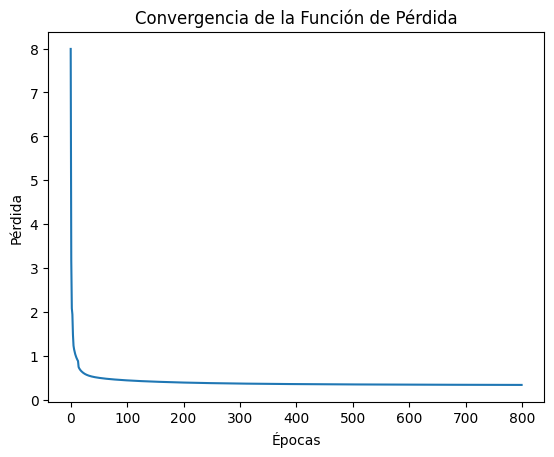

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración y entrenamiento
epochs = 800
eta = 0.4  # Tasa de aprendizaje

# Inicialización
W, b = initialize_weights_He(input_size, output_size)
losses = []
max_accuracy = 0  # Máxima precisión alcanzada
early_stop_counter = 0  # Contador para detener entrenamiento si no mejora
early_stop_threshold = 10  # Número de épocas sin mejora antes de detenerse
# Entrenamiento
for epoch in range(epochs):
    # Propagación hacia adelante
    a2 = forward_propagation(X_train, W, b)

    # Cálculo de la pérdida
    loss = cross_entropy_loss(a2, y_train)
    losses.append(loss)
    # Retropropagación
    W, b = backward_propagation(X_train, y_train, a2, W, b, eta)
    # Evaluar precisión en el conjunto de prueba
    accuracy = evaluate_accuracy(X_test, y_test, W, b)

    # Imprimir progreso
    print(f"Época {epoch}, Pérdida: {loss:.4f}, Precisión: {accuracy * 100:.2f}%")

    # Verificar si la precisión ha mejorado
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        early_stop_counter = 0  # Resetear contador si la precisión mejora
    else:
        early_stop_counter += 1
plt.plot(range(epochs), losses)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Convergencia de la Función de Pérdida')
plt.show()

**SE NECESITARON 731 EPOCAS PARA QUE LA RED NEURONAL LLEGUE AL 100% DE PRECISIÓN**
>Con la funcion de pesos He, Funcion de Activacion ReLU (en la capa de salida), funcion de costos o pérdida Cross entropy loss y taza de aprendizaje 0.4

# **Evaluacion de Predicción**

Precisión: 100.00%
F1-Score: 1.00


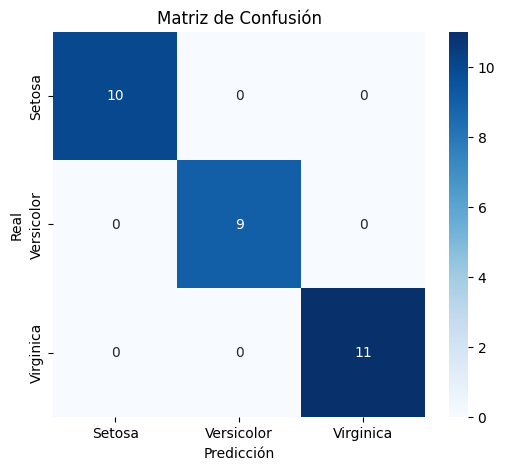

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# Evaluación del modelo
def evaluate_model(X_test, y_test, W, b):
    # Propagación hacia adelante con los datos de prueba
    a2 = forward_propagation(X_test, W, b)

    # Obtener las predicciones como la clase con la mayor probabilidad
    y_pred = np.argmax(a2, axis=1)
    y_true = np.argmax(y_test, axis=1)  # Asumimos que y_test ya está en one-hot encoding

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Calcular otras métricas
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Promedio ponderado para multiclase

    # Imprimir métricas
    print(f"Precisión: {accuracy * 100:.2f}%")
    print(f"F1-Score: {f1:.2f}")

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    return cm
# Llamada a la función de evaluación
evaluate_model(X_test, y_test, W, b)